## Cargando las librerías

In [266]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns

from matplotlib.pyplot import figure


import matplotlib.pyplot as plt
from matplotlib import cm
from collections import Counter


from datetime import date
import calendar

from scipy.stats import chi2_contingency
from pandas.plotting import scatter_matrix



#Ahora scalamos la data para encontrar los segmentos
from sklearn import preprocessing 
from sklearn.cluster import KMeans

#Para balancear la data
from imblearn.over_sampling import SMOTE


# Para modelar:


from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


from statsmodels.discrete.discrete_model import Logit
import statsmodels.api as sm
from sklearn import metrics

import lightgbm as lgbm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score,f1_score

#Para interpretar el sentido de las variables en ML
import shap
#Para guardar
import joblib

## Cargando la data

In [267]:
df = pd.read_csv('ds_challenge_2021.csv',encoding="UTF-8")
df = df.reset_index(drop=True)


In [268]:
#df.tail(50)

In [269]:
#Hay algunos casos que tienen NA y no NaN
df.replace('NA', np.NaN)

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,F,608.345634,2020-01-21,20,"{'model': 2020, 'device_score': 3, 'os': 'ANDR...",Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False
1,0,F,88.719243,2020-01-15,7,"{'model': 2020, 'device_score': 1, 'os': 'ANDR...",NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False
2,1,F,790.037653,2020-01-17,11,"{'model': 2020, 'device_score': 1, 'os': '.'}",NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False
3,1,F,767.005387,2020-01-05,11,"{'model': 2020, 'device_score': 3, 'os': 'WEB'}",MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False
4,1,F,254.171053,2020-01-30,10,"{'model': 2020, 'device_score': 3, 'os': '%%'}",NaN,Guadalajara,Física,94000,56,Aceptada,False,0.000000,2.541711,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,3999,M,746.192089,2020-01-08,13,"{'model': 2020, 'device_score': 2, 'os': 'ANDR...",NaN,Toluca,Física,40000,56,Aceptada,False,0.000000,7.461921,False
26971,3999,M,941.804966,2020-01-14,15,"{'model': 2020, 'device_score': 2, 'os': 'WEB'}",NaN,Toluca,Física,40000,56,Aceptada,False,0.000000,9.418050,False
26972,3999,M,251.189885,2020-01-16,11,"{'model': 2020, 'device_score': 2, 'os': 'WEB'}",NaN,Toluca,Virtual,40000,56,Aceptada,False,0.000000,5.023798,False
26973,3999,M,24.182665,2020-01-13,17,"{'model': 2020, 'device_score': 5, 'os': '.'}",NaN,Toluca,Física,40000,56,Aceptada,False,2.418266,0.217644,False


In [270]:
#Descriptivo
df.describe(include='all')

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
count,26975.000000,26975,26975.000000,26975,26975.000000,26975,16856,15297,26975,26975.000000,26975.000000,26975,26975,26975.000000,26975.000000,26975
unique,NaN,3,NaN,29,NaN,20,5,4,2,NaN,NaN,3,2,NaN,NaN,2
top,NaN,M,NaN,2020-01-29,NaN,"{'model': 2020, 'device_score': 4, 'os': '%%'}",Restaurante,Toluca,Física,NaN,NaN,Aceptada,False,NaN,NaN,False
freq,NaN,13519,NaN,977,NaN,1411,3454,3997,18903,NaN,NaN,18844,23416,NaN,NaN,26165
mean,2003.765412,NaN,499.069493,NaN,11.987618,NaN,NaN,NaN,NaN,62476.811863,48.224875,NaN,NaN,17.466134,6.261186,NaN
std,1144.630736,NaN,289.309518,NaN,6.642565,NaN,NaN,NaN,NaN,21886.892902,9.587256,NaN,NaN,34.334566,4.458440,NaN
min,0.000000,NaN,0.017303,NaN,1.000000,NaN,NaN,NaN,NaN,25000.000000,32.000000,NaN,NaN,0.000000,0.000138,NaN
25%,1041.000000,NaN,246.521227,NaN,6.000000,NaN,NaN,NaN,NaN,44000.000000,40.000000,NaN,NaN,0.000000,2.791740,NaN
50%,2006.000000,NaN,500.501022,NaN,12.000000,NaN,NaN,NaN,NaN,62000.000000,48.000000,NaN,NaN,0.000000,5.636711,NaN
75%,2973.500000,NaN,749.598192,NaN,18.000000,NaN,NaN,NaN,NaN,82000.000000,57.000000,NaN,NaN,18.770710,8.531604,NaN


Text(0, 0.5, 'Frecuencia')

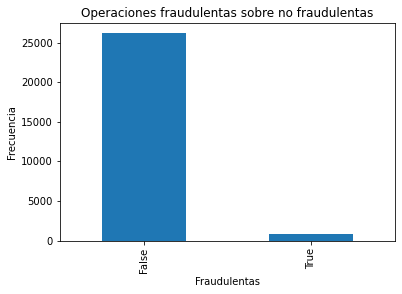

In [271]:
#Revisar frecuencia de Fraude y no fraude
count_classes = pd.value_counts(df['fraude'], sort = False)
count_classes.plot (kind='bar')
plt.title ("Operaciones fraudulentas sobre no fraudulentas")
plt.xlabel ("Fraudulentas")
plt.ylabel ("Frecuencia")

In [272]:
# Las clases están desbalanceadas
print('No Fraude:', round(df['fraude'].value_counts()[0]/len(df) * 100,2), '% del dataset','con',df['fraude'].value_counts()[0],'trxs' )
print('Fraude:', round(df['fraude'].value_counts()[1]/len(df) * 100,2), '% del dataset','con',df['fraude'].value_counts()[1],'trxs' )

No Fraude: 97.0 % del dataset con 26165 trxs
Fraude: 3.0 % del dataset con 810 trxs


In [273]:
#Extraer información del campo dispositivo

In [274]:
# Modificación del feature 'dispositivo'
dispositivo = df["dispositivo"].apply(lambda x : dict(eval(x))).apply(pd.Series)
df.drop(columns = ['dispositivo'], axis = 1, inplace = True)

# Data Frame con todas las features
df = pd.concat([df,dispositivo],axis = 1)

In [275]:
df.head()

,ID_USER,genero,monto,fecha,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,model,device_score,os
0,0,F,608.345634,2020-01-21,20,Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False,2020,3,ANDROID
1,0,F,88.719243,2020-01-15,7,NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False,2020,1,ANDROID
2,1,F,790.037653,2020-01-17,11,NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False,2020,1,.
3,1,F,767.005387,2020-01-05,11,MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False,2020,3,WEB
4,1,F,254.171053,2020-01-30,10,NaN,Guadalajara,Física,94000,56,Aceptada,False,0.000000,2.541711,False,2020,3,%%


In [276]:
#Ahora sacaremos cierta informacion de la variable fecha
#from datetime import date
#import calendar
df['fecha'].dtype

#Vemos que es object: asi que hay que transformar para sacar el día
#saber si es lunes, martes, etc
#Lo demas no aporta tanto, mas que saber la temporalidad de la data

df['DiaSemana'] = pd.to_datetime(df['fecha']).dt.day_name()
df['fecha'] = pd.to_datetime(df['fecha'])


In [277]:
df.head()

,ID_USER,genero,monto,fecha,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,model,device_score,os,DiaSemana
0,0,F,608.345634,2020-01-21,20,Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False,2020,3,ANDROID,Tuesday
1,0,F,88.719243,2020-01-15,7,NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False,2020,1,ANDROID,Wednesday
2,1,F,790.037653,2020-01-17,11,NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False,2020,1,.,Friday
3,1,F,767.005387,2020-01-05,11,MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False,2020,3,WEB,Sunday
4,1,F,254.171053,2020-01-30,10,NaN,Guadalajara,Física,94000,56,Aceptada,False,0.000000,2.541711,False,2020,3,%%,Thursday


## Analizar fechas para ver el numero de clientes y trxs

In [278]:
def f(x):
    tot_monto = x.monto.sum()
    fraude = x.fraude.sum()
    trx = x.fecha.count()
    r_fraude = round(100*fraude/trx,2)
    c = ['tot_monto','fraude','trx','r_fraude']
    return pd.Series([tot_monto, fraude, trx, r_fraude], 
                     index=c)

tb_fecha = df.groupby('fecha').apply(f).reset_index()

#tb_fecha = df.groupby('fecha').agg({'monto': 'sum', 'fraude': 'sum'}).reset_index()
tb_fecha

#https://stackoverflow.com/questions/48441705/r-group-by-summarise-equivalent-in-pandas

,fecha,tot_monto,fraude,trx,r_fraude
0,2020-01-02,456341.359048,28.0,940.0,2.98
1,2020-01-03,455045.221455,31.0,913.0,3.40
2,2020-01-04,443002.877259,24.0,899.0,2.67
3,2020-01-05,468573.919392,30.0,950.0,3.16
4,2020-01-06,454638.205201,29.0,933.0,3.11
5,2020-01-07,477359.864039,22.0,961.0,2.29
6,2020-01-08,477238.207616,27.0,919.0,2.94
7,2020-01-09,453192.117358,28.0,912.0,3.07
8,2020-01-10,429308.511122,18.0,869.0,2.07
9,2020-01-11,461888.068610,26.0,935.0,2.78


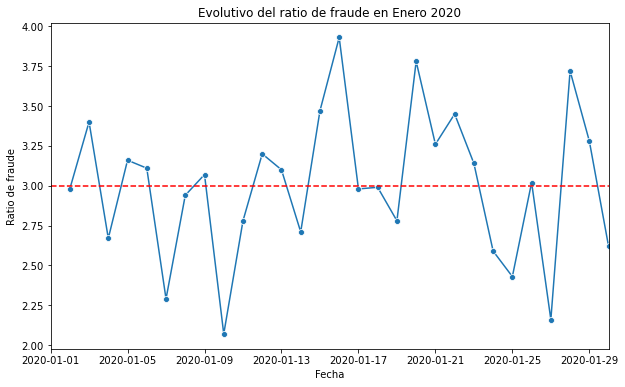

In [279]:
#Graficamos el ratio de trasacciones fraudulentas
#from matplotlib.pyplot import figure

figure(figsize=(10, 6))
       
graph =  sns.lineplot(tb_fecha.fecha, tb_fecha.r_fraude, marker='o')
plt.xlim(date(2020, 1, 1), date(2020, 1, 30))

plt.title('Evolutivo del ratio de fraude en Enero 2020')
plt.ylabel('Ratio de fraude')
plt.xlabel('Fecha')
    
graph.axhline(3, ls='--', c='red')
#The plot is shown
plt.show()

#Va del 2 al 30 de enero 2020

#Tenemos que picos de fraude el 16,20 y 28 de enero

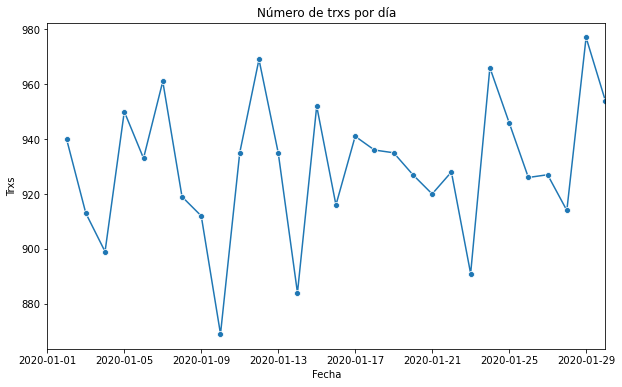

In [280]:
figure(figsize=(10, 6))
       
graph =  sns.lineplot(tb_fecha.fecha, tb_fecha.trx, marker='o')
plt.xlim(date(2020, 1, 1), date(2020, 1, 30))

plt.title('Número de trxs por día')
plt.ylabel('Trxs')
plt.xlabel('Fecha')
    
#graph.axhline(3, ls='--', c='red')
#The plot is shown
plt.show()


## Revisaremos la cantidad de missing por data transacciones

In [281]:
# Revisando los missings:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [282]:
total_missing = missing_values_table(df)
total_missing

Your selected dataframe has 19 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
ciudad,11678,43.3
establecimiento,10119,37.5


In [283]:
#Se tiene que solo hay 2 variables con missing ciudad y establecimientos y tienen 43% y 37% respectivamente

In [284]:
#Se puede imputar o en todo caso crear una variable con una categoria de Sin informacion. Por la cantidad de missing, voy
#a crear una categoria de Sin informacion

In [285]:
#Filling NaN values
df.establecimiento = df.establecimiento.fillna('SIN_INFORMACION')
df.ciudad = df.ciudad.fillna('SIN_INFORMACION')

In [286]:
total_missing = missing_values_table(df)
total_missing
#Vemos que ya no hay variables con missing

Your selected dataframe has 19 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [287]:
#Feature Enginering
#Creacion de 3 variables
#Num de trxs, porcentaje de descuento y  flag de descuento
df['trxs']=df['ID_USER'].map(df['ID_USER'].value_counts())
df['Porc_dscto'] = df[['dcto','monto']].apply(lambda row:row[0]/row[1] if row[1]!=0 else 0,axis=1)
df["FLG_dscto"] = np.where(df["dcto"]>0,1,0)



In [288]:
df.dtypes

ID_USER                     int64
genero                     object
monto                     float64
fecha              datetime64[ns]
hora                        int64
establecimiento            object
ciudad                     object
tipo_tc                    object
linea_tc                    int64
interes_tc                  int64
status_txn                 object
is_prime                     bool
dcto                      float64
cashback                  float64
fraude                       bool
model                       int64
device_score                int64
os                         object
DiaSemana                  object
trxs                        int64
Porc_dscto                float64
FLG_dscto                   int32
dtype: object

In [289]:
## Revisaremos las variables categoricas
# Variables categóricas:
vars_cat = ['genero','establecimiento','ciudad','tipo_tc','status_txn','is_prime','model','device_score'
            ,'os','fraude','DiaSemana','FLG_dscto']

In [290]:
# Revisando distribuciones de las variables categoricas:
for i in vars_cat:
    print("---------------------------------------------------------------------------------------------")
    print(df[i].value_counts(dropna=False)) # Los NaN que salen son missing!

---------------------------------------------------------------------------------------------
M     13519
F     10726
--     2730
Name: genero, dtype: int64
---------------------------------------------------------------------------------------------
SIN_INFORMACION    10119
Restaurante         3454
Abarrotes           3415
Super               3402
MPago               3343
Farmacia            3242
Name: establecimiento, dtype: int64
---------------------------------------------------------------------------------------------
SIN_INFORMACION    11678
Toluca              3997
Guadalajara         3833
Merida              3761
Monterrey           3706
Name: ciudad, dtype: int64
---------------------------------------------------------------------------------------------
Física     18903
Virtual     8072
Name: tipo_tc, dtype: int64
---------------------------------------------------------------------------------------------
Aceptada      18844
En proceso     5341
Rechazada      2790
Name: s

In [291]:
#Obs
#1. Genero tiene una categoria desconocida
#2. Model solo tiene una categoria, por lo cual, debemos eliminar esa variable
#3. En Os hay %% como categoria y un ., que vienen a ser missing

#3. Fecha tambien se eliminara

In [292]:
#Como son pocos los casos de genero, puedo imputarlo por la moda
df["genero"] = np.where(df["genero"]=='--','M','F')
df["os"] = np.where(df["os"]=='%%','OTRO',
                    np.where(df["os"]=='.','SIN_INFORMACION',df["os"]))



In [293]:
# Drop feature 'model'
df.drop(columns = ['model','fecha'], axis = 1, inplace = True)
df.head()

,ID_USER,genero,monto,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,device_score,os,DiaSemana,trxs,Porc_dscto,FLG_dscto
0,0,F,608.345634,20,Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False,3,ANDROID,Tuesday,2,0.1,1
1,0,F,88.719243,7,SIN_INFORMACION,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False,1,ANDROID,Wednesday,2,0.0,0
2,1,F,790.037653,11,SIN_INFORMACION,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False,1,SIN_INFORMACION,Friday,7,0.0,0
3,1,F,767.005387,11,MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False,3,WEB,Sunday,7,0.0,0
4,1,F,254.171053,10,SIN_INFORMACION,Guadalajara,Física,94000,56,Aceptada,False,0.000000,2.541711,False,3,OTRO,Thursday,7,0.0,0


In [294]:
#Hasta acá tenemos la tabla final de trxs
#Guardaremos la tabla de trxs final en un pkl
#df.to_pickle('data_trxs_procesada.pkl')

## 1. Explorar data - EDA

## Analizar Variables categoricas
### 1. Correlacion - Chi cuadrado


In [295]:
#Variables categoricas
cols_categ = ['genero','establecimiento','ciudad','tipo_tc','status_txn','is_prime','device_score',
            'os','DiaSemana','FLG_dscto','fraude']
data_categ = df.loc[:,cols_categ].copy()
data_categ.head()

,genero,establecimiento,ciudad,tipo_tc,status_txn,is_prime,device_score,os,DiaSemana,FLG_dscto,fraude
0,F,Super,Merida,Física,Aceptada,False,3,ANDROID,Tuesday,1,False
1,F,SIN_INFORMACION,Merida,Virtual,Aceptada,False,1,ANDROID,Wednesday,0,False
2,F,SIN_INFORMACION,Guadalajara,Virtual,En proceso,False,1,SIN_INFORMACION,Friday,0,False
3,F,MPago,Guadalajara,Física,Aceptada,False,3,WEB,Sunday,0,False
4,F,SIN_INFORMACION,Guadalajara,Física,Aceptada,False,3,OTRO,Thursday,0,False


In [296]:
### CORRELACION
#from scipy.stats import chi2_contingency
#from pandas.plotting import scatter_matrix
# Con chi cuadrado
# Chi square hypothesis test is used to determine correlation 
# between the categorical variables
#alpha = 0.05
cols_categ = data_categ.columns
len_c = len(data_categ.columns)
p_vals = np.zeros((len_c,len_c))
for c1 in range(len_c):
    for c2 in range(len_c):
        cont_tab = (pd.crosstab(data_categ[cols_categ[c1]], 
                        columns= data_categ[cols_categ[c2]]))
        p_vals[c1][c2] = 1-chi2_contingency(cont_tab)[1] #para tener valores grandes

df_chi = pd.DataFrame(p_vals,index = cols_categ,columns=cols_categ)
df_chi
#mayor a 0.95 rechazamos

,genero,establecimiento,ciudad,tipo_tc,status_txn,is_prime,device_score,os,DiaSemana,FLG_dscto,fraude
genero,1.000000,0.329802,1.000000,0.154678,0.814362,0.998895,0.076272,0.463546,0.570186,0.944469,0.486530
establecimiento,0.329802,1.000000,0.648079,0.995042,0.629338,0.786314,0.239518,0.341303,0.304594,0.475338,0.174669
ciudad,1.000000,0.648079,1.000000,0.485450,0.186711,0.990788,0.968106,0.096145,0.507932,0.961315,0.223573
tipo_tc,0.154678,0.995042,0.485450,1.000000,0.278685,0.556289,0.175583,0.028814,0.938112,0.520010,0.603555
status_txn,0.814362,0.629338,0.186711,0.278685,1.000000,0.932558,0.409049,0.421429,0.600458,0.904783,0.205128
is_prime,0.998895,0.786314,0.990788,0.556289,0.932558,1.000000,0.162579,0.462393,0.243295,0.838687,0.498040
device_score,0.076272,0.239518,0.968106,0.175583,0.409049,0.162579,1.000000,0.180411,0.800566,0.329948,0.611782
os,0.463546,0.341303,0.096145,0.028814,0.421429,0.462393,0.180411,1.000000,0.578101,0.586860,0.616873
DiaSemana,0.570186,0.304594,0.507932,0.938112,0.600458,0.243295,0.800566,0.578101,1.000000,0.650964,0.206975
FLG_dscto,0.944469,0.475338,0.961315,0.520010,0.904783,0.838687,0.329948,0.586860,0.650964,1.000000,0.389419


In [297]:
#Genero esta correlacionado con is_prime y ciudad
#Ciudad: is_prime, device_score, os
#tipo_tc: establecimiento
#is_prime: genero, ciudad
#devide_score: ciudad

#Por lo tanto eliminamos:establecimiento tiene poca relación con fraude y esta correlacionada
#Lo mismo con ciudad
#Y finalmente género. Se queda is_prime porque tiene una ligera mayor relación con fraude



In [298]:
#establecimiento, ciudad and genero can be eliminated
var_elim_cat = ['genero','establecimiento','ciudad']
# Drop feature 'model'
data_categ.drop(columns = var_elim_cat, axis = 1, inplace = True)
data_categ.head()

,tipo_tc,status_txn,is_prime,device_score,os,DiaSemana,FLG_dscto,fraude
0,Física,Aceptada,False,3,ANDROID,Tuesday,1,False
1,Virtual,Aceptada,False,1,ANDROID,Wednesday,0,False
2,Virtual,En proceso,False,1,SIN_INFORMACION,Friday,0,False
3,Física,Aceptada,False,3,WEB,Sunday,0,False
4,Física,Aceptada,False,3,OTRO,Thursday,0,False


### 2. Bivariado con target

In [299]:
vars_cat = ['tipo_tc','status_txn','is_prime','device_score',
            'os','DiaSemana','FLG_dscto']

In [300]:
# Revisando distribuciones de las variables categoricas:
for i in vars_cat:
    print("---------------------------------------------------------------------------------------------")
    print(pd.crosstab(data_categ[i],data_categ['fraude'], normalize='index'))
    print("\nDistribucion")
    print(data_categ[i].value_counts(normalize='index'))# Los NaN que salen son missing!

---------------------------------------------------------------------------------------------
fraude      False      True
tipo_tc                    
Física   0.969370  0.030630
Virtual  0.971383  0.028617

Distribucion
Física     0.70076
Virtual    0.29924
Name: tipo_tc, dtype: float64
---------------------------------------------------------------------------------------------
fraude         False      True
status_txn                    
Aceptada    0.969752  0.030248
En proceso  0.969669  0.030331
Rechazada   0.972043  0.027957

Distribucion
Aceptada      0.698573
En proceso    0.197998
Rechazada     0.103429
Name: status_txn, dtype: float64
---------------------------------------------------------------------------------------------
fraude       False      True
is_prime                    
False     0.969679  0.030321
True      0.971902  0.028098

Distribucion
False    0.868063
True     0.131937
Name: is_prime, dtype: float64
--------------------------------------------------------

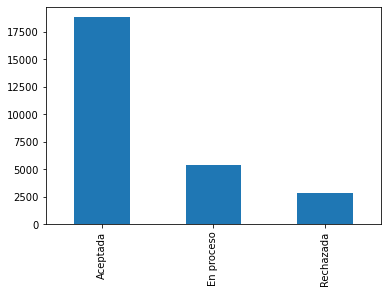

In [301]:
# Veamos un gráfico de barras para el feature status_txn
data_categ.status_txn.value_counts().plot.bar()

#### Conclusion Análisis variable categóricas

In [302]:
#Conclusion
#1. Se excluye la variablemodelo por ser una sola categoria
#2. Hay variables que tienen correlacion por lo que se les ha excluido y por la cantidad de missing


#Las TC físicas son más propensas a ser usadas como fraude
#Cliente prime es menos propenso a tener una trxs fraudulenta
#En android hay más probabilidad de que se realice un fraude y en web el menos probable
#Los miércoles probablementeson los días con mayor casos de fraude y sabado y viernes con menos probabilidad


## Analizar Variables numéricas
### 1. Correlacion


In [303]:
#Variables numércias
cols_num = ['monto','hora','linea_tc','interes_tc','dcto','cashback','trxs','Porc_dscto','fraude']
data_num = df.loc[:,cols_num]
data_num.head()

,monto,hora,linea_tc,interes_tc,dcto,cashback,trxs,Porc_dscto,fraude
0,608.345634,20,71000,51,60.834563,5.475111,2,0.1,False
1,88.719243,7,71000,51,0.000000,1.774385,2,0.0,False
2,790.037653,11,94000,56,0.000000,15.800753,7,0.0,False
3,767.005387,11,94000,56,0.000000,7.670054,7,0.0,False
4,254.171053,10,94000,56,0.000000,2.541711,7,0.0,False


In [304]:
# Pearson correlation
corr_num = data_num.corr(method = 'pearson')
corr_num

,monto,hora,linea_tc,interes_tc,dcto,cashback,trxs,Porc_dscto,fraude
monto,1.000000,-0.004348,-0.008415,0.014449,0.286717,0.814530,0.002589,-0.005867,-0.004239
hora,-0.004348,1.000000,0.003117,0.000413,0.002032,-0.009657,-0.002765,0.007854,0.013376
linea_tc,-0.008415,0.003117,1.000000,-0.039932,0.002777,-0.003100,0.000044,0.005729,-0.000488
interes_tc,0.014449,0.000413,-0.039932,1.000000,0.003984,0.012961,0.030991,0.002849,-0.003130
dcto,0.286717,0.002032,0.002777,0.003984,1.000000,0.147308,0.003761,0.827736,-0.000735
cashback,0.814530,-0.009657,-0.003100,0.012961,0.147308,1.000000,0.003788,-0.084715,-0.004337
trxs,0.002589,-0.002765,0.000044,0.030991,0.003761,0.003788,1.000000,0.002966,0.001090
Porc_dscto,-0.005867,0.007854,0.005729,0.002849,0.827736,-0.084715,0.002966,1.000000,-0.001160
fraude,-0.004239,0.013376,-0.000488,-0.003130,-0.000735,-0.004337,0.001090,-0.001160,1.000000


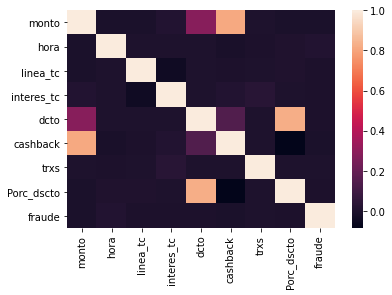

In [305]:
sns.heatmap(corr_num)

In [306]:
#Monto esta relacionado con el cashback, algo que hace sentido, a mayor monto, mayor cashback
#Pero por esta vez no lo voy a excluir
#Otra variable correlacionada es Porc_dscto, donde el dscto es parte de su cálculo

#Para esta vez,voy a excluir el descto
#descto
#establecimiento, ciudad and genero can be eliminated
#var_elim_num = ['dcto','cashback']
var_elim_num = ['Porc_dscto']

data_num.drop(columns = var_elim_num, axis = 1, inplace = True)
data_num.head()

,monto,hora,linea_tc,interes_tc,dcto,cashback,trxs,fraude
0,608.345634,20,71000,51,60.834563,5.475111,2,False
1,88.719243,7,71000,51,0.000000,1.774385,2,False
2,790.037653,11,94000,56,0.000000,15.800753,7,False
3,767.005387,11,94000,56,0.000000,7.670054,7,False
4,254.171053,10,94000,56,0.000000,2.541711,7,False


### 2. Bivariado con target - BOXPLOT

Text(0.5, 1.0, 'Monto por Trxs Fraudulenta')

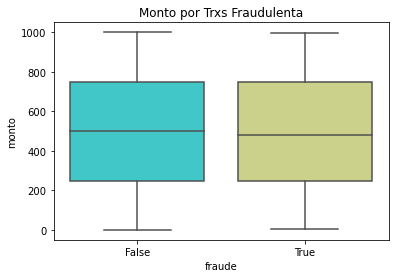

In [307]:
sns.boxplot(x='fraude',y=data_num['monto'],data=data_num, palette='rainbow')
plt.title("Monto por Trxs Fraudulenta")

Text(0.5, 1.0, 'cashback por Trxs Fraudulenta')

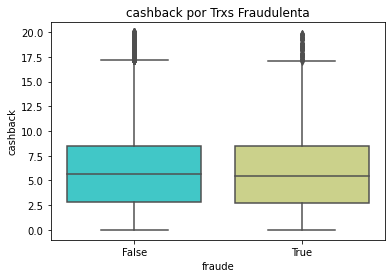

In [308]:
sns.boxplot(x='fraude',y=data_num['cashback'],data=data_num, palette='rainbow')
plt.title("cashback por Trxs Fraudulenta")

Text(0.5, 1.0, 'hora por Trxs Fraudulenta')

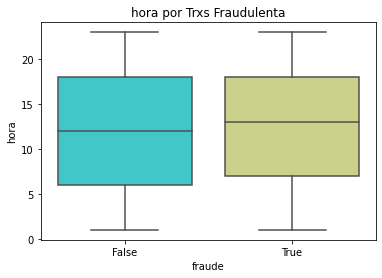

In [309]:
sns.boxplot(x='fraude',y=data_num['hora'],data=data_num, palette='rainbow')
plt.title("hora por Trxs Fraudulenta")

Text(0.5, 1.0, 'linea_tc por Trxs Fraudulenta')

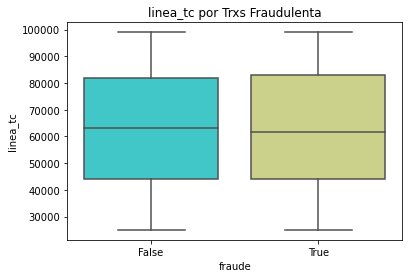

In [310]:
sns.boxplot(x='fraude',y=data_num['linea_tc'],data=data_num, palette='rainbow')
plt.title("linea_tc por Trxs Fraudulenta")

Text(0.5, 1.0, 'interes_tc por Trxs Fraudulenta')

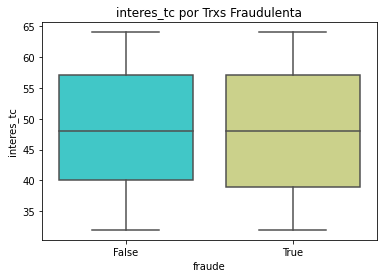

In [311]:
sns.boxplot(x='fraude',y=data_num['interes_tc'],data=data_num, palette='rainbow')
plt.title("interes_tc por Trxs Fraudulenta")

Text(0.5, 1.0, 'trxs por Trxs Fraudulenta')

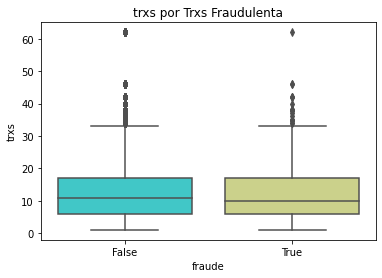

In [312]:
sns.boxplot(x='fraude',y=data_num['trxs'],data=data_num, palette='rainbow')
plt.title("trxs por Trxs Fraudulenta")

Text(0.5, 1.0, 'dcto por Trxs Fraudulenta')

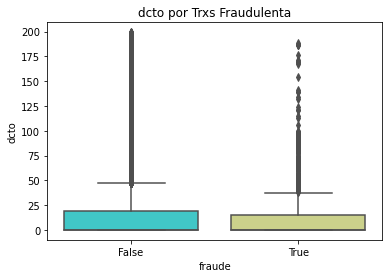

In [313]:
sns.boxplot(x='fraude',y=data_num['dcto'],data=data_num, palette='rainbow')
plt.title("dcto por Trxs Fraudulenta")

In [314]:
#Conclusiones
# Hay 2 variables que se deberían excluir por tener correlacion por encima del 0.8, pero solo excluyo porc_dscto
# Del boxplot se tiene ciertos insigths
# Montos más bajos son los que ligeramente tienden a ser fraudes
# Cashback mas bajos son más fraudulentos
# A mayor linea menos fraude
#Hay variables que solas no generan mucho valor: Como la tasa de inteses

#También se tiene outlier en la variable trxs, al parecer hay usuarios que hacen más de 40 días en el mes

## 2. CLUSTERING CLIENTE

In [315]:
#Eliminar las variables iniciales
var_elim = ['genero','establecimiento','ciudad','Porc_dscto']
df_cli = df.copy()

df_cli.drop(columns = var_elim, axis = 1, inplace = True)
df_cli.head()

,ID_USER,monto,hora,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,device_score,os,DiaSemana,trxs,FLG_dscto
0,0,608.345634,20,Física,71000,51,Aceptada,False,60.834563,5.475111,False,3,ANDROID,Tuesday,2,1
1,0,88.719243,7,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False,1,ANDROID,Wednesday,2,0
2,1,790.037653,11,Virtual,94000,56,En proceso,False,0.000000,15.800753,False,1,SIN_INFORMACION,Friday,7,0
3,1,767.005387,11,Física,94000,56,Aceptada,False,0.000000,7.670054,False,3,WEB,Sunday,7,0
4,1,254.171053,10,Física,94000,56,Aceptada,False,0.000000,2.541711,False,3,OTRO,Thursday,7,0


In [316]:
#Dummy las variables categoricas
vars_cat = ['tipo_tc','status_txn','os','DiaSemana']

    
# Vamos a Crear las dummies para las categoricas
dummies_df_cli = pd.get_dummies(df_cli[vars_cat])
# Concatenando con el dataset:
df_cli = pd.concat((df_cli,dummies_df_cli),axis=1)

In [317]:
# eliminando las categóricas dado que ya están como dummies:
df_cli = df_cli.drop(vars_cat,axis=1)
df_cli.head()

,ID_USER,monto,hora,linea_tc,interes_tc,is_prime,dcto,cashback,fraude,device_score,...,os_OTRO,os_SIN_INFORMACION,os_WEB,DiaSemana_Friday,DiaSemana_Monday,DiaSemana_Saturday,DiaSemana_Sunday,DiaSemana_Thursday,DiaSemana_Tuesday,DiaSemana_Wednesday
0,0,608.345634,20,71000,51,False,60.834563,5.475111,False,3,...,0,0,0,0,0,0,0,0,1,0
1,0,88.719243,7,71000,51,False,0.000000,1.774385,False,1,...,0,0,0,0,0,0,0,0,0,1
2,1,790.037653,11,94000,56,False,0.000000,15.800753,False,1,...,0,1,0,1,0,0,0,0,0,0
3,1,767.005387,11,94000,56,False,0.000000,7.670054,False,3,...,0,0,1,0,0,0,1,0,0,0
4,1,254.171053,10,94000,56,False,0.000000,2.541711,False,3,...,1,0,0,0,0,0,0,1,0,0


In [318]:
#convertir las variables

In [319]:
df_cli["is_prime"] = np.where(df_cli["is_prime"]==False,0,1)
df_cli["fraude"] = np.where(df_cli["fraude"]==False,0,1)
df_cli.head()

,ID_USER,monto,hora,linea_tc,interes_tc,is_prime,dcto,cashback,fraude,device_score,...,os_OTRO,os_SIN_INFORMACION,os_WEB,DiaSemana_Friday,DiaSemana_Monday,DiaSemana_Saturday,DiaSemana_Sunday,DiaSemana_Thursday,DiaSemana_Tuesday,DiaSemana_Wednesday
0,0,608.345634,20,71000,51,0,60.834563,5.475111,0,3,...,0,0,0,0,0,0,0,0,1,0
1,0,88.719243,7,71000,51,0,0.000000,1.774385,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,790.037653,11,94000,56,0,0.000000,15.800753,0,1,...,0,1,0,1,0,0,0,0,0,0
3,1,767.005387,11,94000,56,0,0.000000,7.670054,0,3,...,0,0,1,0,0,0,1,0,0,0
4,1,254.171053,10,94000,56,0,0.000000,2.541711,0,3,...,1,0,0,0,0,0,0,1,0,0


In [320]:
#Ahora hay que agrupar para trabajar a nivel ID_USER
df_cli.columns


Index(['ID_USER', 'monto', 'hora', 'linea_tc', 'interes_tc', 'is_prime',
       'dcto', 'cashback', 'fraude', 'device_score', 'trxs', 'FLG_dscto',
       'tipo_tc_Física', 'tipo_tc_Virtual', 'status_txn_Aceptada',
       'status_txn_En proceso', 'status_txn_Rechazada', 'os_ANDROID',
       'os_OTRO', 'os_SIN_INFORMACION', 'os_WEB', 'DiaSemana_Friday',
       'DiaSemana_Monday', 'DiaSemana_Saturday', 'DiaSemana_Sunday',
       'DiaSemana_Thursday', 'DiaSemana_Tuesday', 'DiaSemana_Wednesday'],
      dtype='object')

In [321]:
# 1. Basado en criterio tomamos variables para haer un resumen de la suma total a nivel usuario
df_num = df_cli.groupby(['ID_USER'])[['monto','is_prime','fraude','tipo_tc_Física',  'status_txn_Rechazada', 'os_ANDROID',
        'os_WEB']].sum().reset_index().rename(columns={"fraude":"n_fraude"})
df_num.head()

,ID_USER,monto,is_prime,n_fraude,tipo_tc_Física,status_txn_Rechazada,os_ANDROID,os_WEB
0,0,697.064876,0,0,1,0,2,0
1,1,3416.796066,0,0,5,1,0,1
2,2,2789.893416,0,0,6,0,3,3
3,3,477.972148,0,0,2,0,2,0
4,4,277.176524,0,0,1,0,0,1


In [322]:
# 2. Nº trxs por ID_USER
df_trxs = df_cli.groupby(['ID_USER'])[['ID_USER']].count().rename(columns={"ID_USER":"Trxs"}).reset_index()
df_trxs.head()

,ID_USER,Trxs
0,0,2
1,1,7
2,2,7
3,3,2
4,4,1


In [323]:
# 6. Promedio de las siguientes variables
df_prom = df_cli.groupby(['ID_USER'])[['linea_tc', 'interes_tc','device_score']].mean().reset_index()
df_prom

,ID_USER,linea_tc,interes_tc,device_score
0,0,71000.0,51.0,2.000000
1,1,94000.0,56.0,2.428571
2,2,55000.0,57.0,2.714286
3,3,62000.0,34.0,2.500000
4,4,83000.0,37.0,2.000000
...,...,...,...,...
3995,3995,79000.0,37.0,2.571429
3996,3996,25000.0,57.0,3.333333
3997,3997,45000.0,52.0,3.000000
3998,3998,28000.0,39.0,2.333333


In [324]:
#Flag Fraude y Flag Prime
df_num["FLG_prime"] = np.where(df_num["is_prime"]>=1,1,0)
df_num["FLG_fraude"] = np.where(df_num["n_fraude"]>=1,1,0)
df_num.drop(columns = 'is_prime', axis = 1, inplace = True)
df_num.head()

,ID_USER,monto,n_fraude,tipo_tc_Física,status_txn_Rechazada,os_ANDROID,os_WEB,FLG_prime,FLG_fraude
0,0,697.064876,0,1,0,2,0,0,0
1,1,3416.796066,0,5,1,0,1,0,0
2,2,2789.893416,0,6,0,3,3,0,0
3,3,477.972148,0,2,0,2,0,0,0
4,4,277.176524,0,1,0,0,1,0,0


In [325]:
#Unir todas las bases
df_cli_clus = pd.merge(df_num,df_trxs,left_on=['ID_USER'],right_on=['ID_USER'],how='left')
df_cli_clus = pd.merge(df_cli_clus,df_prom,left_on=['ID_USER'],right_on=['ID_USER'],how='left')
print(df_cli_clus.shape)
df_cli_clus.head()

(4000, 13)


,ID_USER,monto,n_fraude,tipo_tc_Física,status_txn_Rechazada,os_ANDROID,os_WEB,FLG_prime,FLG_fraude,Trxs,linea_tc,interes_tc,device_score
0,0,697.064876,0,1,0,2,0,0,0,2,71000.0,51.0,2.000000
1,1,3416.796066,0,5,1,0,1,0,0,7,94000.0,56.0,2.428571
2,2,2789.893416,0,6,0,3,3,0,0,7,55000.0,57.0,2.714286
3,3,477.972148,0,2,0,2,0,0,0,2,62000.0,34.0,2.500000
4,4,277.176524,0,1,0,0,1,0,0,1,83000.0,37.0,2.000000


## Guarda mi tabla trabajada de clientes

In [326]:
## Tengo mi tabla final de clientes
#Hasta acá tenemos la tabla final de trxs
#Guardaremos la tabla de clientes final en un pkl
#df_cli_clus.to_pickle('data_cliente_procesada.pkl')

### K-means

In [327]:
#Se elimnan variables sobre fraude y ID que no contribuyen para la segmentacion
#La variable fraude tendrá mayor relevancia en el perfilamiento
df_cli_clus2 = df_cli_clus[[i for i in df_cli_clus.columns if i not in ["FLG_fraude","ID_USER",'n_fraude'] ]]

In [328]:
# Pearson correlation
corr_num = df_cli_clus2.corr(method = 'pearson')
corr_num

,monto,tipo_tc_Física,status_txn_Rechazada,os_ANDROID,os_WEB,FLG_prime,Trxs,linea_tc,interes_tc,device_score
monto,1.000000,0.936927,0.640452,0.774351,0.805554,-0.009701,0.973480,0.001040,0.015917,-0.007440
tipo_tc_Física,0.936927,1.000000,0.627496,0.771852,0.794589,-0.007749,0.962690,0.002789,0.006374,-0.003112
status_txn_Rechazada,0.640452,0.627496,1.000000,0.526667,0.545016,-0.031161,0.656100,0.014069,-0.003709,-0.003782
os_ANDROID,0.774351,0.771852,0.526667,1.000000,0.536737,-0.012599,0.800939,-0.007451,0.007385,0.000666
os_WEB,0.805554,0.794589,0.545016,0.536737,1.000000,-0.005812,0.822421,0.001024,0.007862,-0.011904
FLG_prime,-0.009701,-0.007749,-0.031161,-0.012599,-0.005812,1.000000,-0.011356,0.000942,-0.030566,-0.015797
Trxs,0.973480,0.962690,0.656100,0.800939,0.822421,-0.011356,1.000000,0.006437,0.007197,-0.008490
linea_tc,0.001040,0.002789,0.014069,-0.007451,0.001024,0.000942,0.006437,1.000000,0.006021,0.002044
interes_tc,0.015917,0.006374,-0.003709,0.007385,0.007862,-0.030566,0.007197,0.006021,1.000000,-0.016355
device_score,-0.007440,-0.003112,-0.003782,0.000666,-0.011904,-0.015797,-0.008490,0.002044,-0.016355,1.000000


In [329]:
#Hay una correlacion de trxs, así que la eliminaré pero me ayudara para perfilar
df_cli_clus2.drop(columns = ['Trxs','tipo_tc_Física'], axis = 1, inplace = True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [330]:
df_cli_clus2.head()

,monto,status_txn_Rechazada,os_ANDROID,os_WEB,FLG_prime,linea_tc,interes_tc,device_score
0,697.064876,0,2,0,0,71000.0,51.0,2.000000
1,3416.796066,1,0,1,0,94000.0,56.0,2.428571
2,2789.893416,0,3,3,0,55000.0,57.0,2.714286
3,477.972148,0,2,0,0,62000.0,34.0,2.500000
4,277.176524,0,0,1,0,83000.0,37.0,2.000000


In [331]:
#Ahora scalamos la data para encontrar los segmentos
#import pandas as pd
#from sklearn import preprocessing 
#from sklearn.cluster import KMeans
#import matplotlib.pyplot as plt

#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df_cli_clus2)

scaler = preprocessing.MinMaxScaler() 
a = df_cli_clus2.columns
X_scaled = scaler.fit(df_cli_clus2).transform(df_cli_clus2)

X_scaled = pd.DataFrame(X_scaled, columns=a)
X_scaled = X_scaled.reset_index(drop=True)
#df_total_scale = pd.concat((df_cli_clus2,X_scaled),axis=1)
df_total_scale = X_scaled.reset_index(drop=True)
print(df_total_scale.shape)
print(df_cli_clus2.shape)
df_total_scale.head()

(4000, 8)
(4000, 8)


,monto,status_txn_Rechazada,os_ANDROID,os_WEB,FLG_prime,linea_tc,interes_tc,device_score
0,0.021219,0.000000,0.133333,0.000000,0.0,0.621622,0.59375,0.250000
1,0.104252,0.111111,0.000000,0.058824,0.0,0.932432,0.75000,0.357143
2,0.085113,0.000000,0.200000,0.176471,0.0,0.405405,0.78125,0.428571
3,0.014530,0.000000,0.133333,0.000000,0.0,0.500000,0.06250,0.375000
4,0.008400,0.000000,0.000000,0.058824,0.0,0.783784,0.15625,0.250000


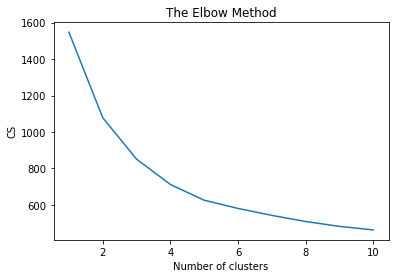

In [332]:
#from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_total_scale)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [333]:
# Kmeans con 4 clusters
#tambien puede ser 5
kmeans_ = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans_.fit_predict(df_total_scale)
df_cli_clus['Cluster'] = cluster_labels
# Cantidad de elementos por grupo
#df_cli_clus.groupby('Cluster').sum()
#cluster_labels: tiene los cluster de los usuarios
df_cli_clus.head()
#Tiene la variable cluster

,ID_USER,monto,n_fraude,tipo_tc_Física,status_txn_Rechazada,os_ANDROID,os_WEB,FLG_prime,FLG_fraude,Trxs,linea_tc,interes_tc,device_score,Cluster
0,0,697.064876,0,1,0,2,0,0,0,2,71000.0,51.0,2.000000,0
1,1,3416.796066,0,5,1,0,1,0,0,7,94000.0,56.0,2.428571,0
2,2,2789.893416,0,6,0,3,3,0,0,7,55000.0,57.0,2.714286,3
3,3,477.972148,0,2,0,2,0,0,0,2,62000.0,34.0,2.500000,1
4,4,277.176524,0,1,0,0,1,0,0,1,83000.0,37.0,2.000000,1


In [334]:
df_cli_clus.Cluster.value_counts(normalize='index')

1    0.32500
3    0.27025
0    0.26925
2    0.13550
Name: Cluster, dtype: float64

In [335]:
var_perfil = ['monto','Trxs','linea_tc',
'interes_tc','n_fraude','FLG_fraude',
              'FLG_prime','status_txn_Rechazada',

'Cluster']
df_cli_clus[var_perfil].groupby('Cluster').mean().add_suffix('_mean').fillna(0)

,monto_mean,Trxs_mean,linea_tc_mean,interes_tc_mean,n_fraude_mean,FLG_fraude_mean,FLG_prime_mean,status_txn_Rechazada_mean
Cluster,,,,,,,,
0,3234.252563,6.520891,82841.225627,54.133705,0.183844,0.151346,0.0,0.684308
1,3338.902184,6.747692,61782.307692,38.221538,0.209231,0.173846,0.0,0.706154
2,3287.763594,6.566421,62400.369004,47.426199,0.184502,0.147601,1.0,0.616236
3,3567.593752,7.049954,42587.419056,54.535615,0.222017,0.190564,0.0,0.740981


In [336]:
#0: Bajo valor con riesgo intermedio: Grupo de usuarios con línea de TC más alta y 
#con una Tasa de interés alta, pero bajo consumo y con fraude intermedio
#1: Mediano valor con riesgo alto: Grupo de usuarios con una línea de TC intermedia con la Tasa de interés más baja 
#y consumo intermedio. Con respecto al fraude, tiene un fraude alto con un gran número de txs rechazadas.
#2: Bajo valor con riesgo bajo: Grupo de cliente con bajo consumo pero línea de TC intermedia y es el 
#grupo de clientes con menos usuarios fraudulentos
#3: Alto valor con riesgo muy alto: Grupo de clientes con gran consumo y menor línea de TC con tasa super alta 
#y concentra la mayor cantidad de clientes con fraude


clust_map = {
    0:'BV_RI',
    1:'MV_RA',
    2:'BV_RB',
    3:'AV_RMA'
}

df_cli_clus.Cluster = df_cli_clus.Cluster.map(clust_map)

In [337]:
df_cli_clus.Cluster.value_counts(normalize='index')

MV_RA     0.32500
AV_RMA    0.27025
BV_RI     0.26925
BV_RB     0.13550
Name: Cluster, dtype: float64

In [338]:
df_cli_clus.head()

,ID_USER,monto,n_fraude,tipo_tc_Física,status_txn_Rechazada,os_ANDROID,os_WEB,FLG_prime,FLG_fraude,Trxs,linea_tc,interes_tc,device_score,Cluster
0,0,697.064876,0,1,0,2,0,0,0,2,71000.0,51.0,2.000000,BV_RI
1,1,3416.796066,0,5,1,0,1,0,0,7,94000.0,56.0,2.428571,BV_RI
2,2,2789.893416,0,6,0,3,3,0,0,7,55000.0,57.0,2.714286,AV_RMA
3,3,477.972148,0,2,0,2,0,0,0,2,62000.0,34.0,2.500000,MV_RA
4,4,277.176524,0,1,0,0,1,0,0,1,83000.0,37.0,2.000000,MV_RA


In [339]:
#Fin de la segmentacion

In [340]:
#CONCLUSIONES:
#Se genera la segmentación para poder distingir los grupos y revisar que segmento debemos hacer más foco que a otros
#Podríamos hacer un modelo por cada segmento pero tenemos poco resgistro, asi que también puede ayudar incluir
#la variable segmento

# Se encontraton 4 segmentos que se diferencia por su valor en cuanto al consumo que realiza, información de su TC
#y se cruza también con el grupo de clientes que tienen mayor fraude y las trxs más fraudulentas


In [342]:
#Guardaremos informacion para hacer replicable la segmentacion

In [343]:
var_clus = ['monto',
'status_txn_Rechazada',
'os_ANDROID',
'os_WEB',
'FLG_prime',
'linea_tc',
'interes_tc',
'device_score']
var_clus


# Para guardar objetos:
#import joblib
#joblib.dump(var_clus, 'var_cluster.pkl')

#joblib.dump(kmeans_, 'segm_kmeans.pkl')
#joblib.dump(scaler, 'scale_segm_kmeans.pkl')



['scale_segm_kmeans.pkl']

## 3. Modelo

## a. Modelo nivel trxs

In [443]:
df_trx = df_cli.copy()
df_trx = df_trx.drop('trxs',axis=1)
df_trx.head()

,ID_USER,monto,hora,linea_tc,interes_tc,is_prime,dcto,cashback,fraude,device_score,...,os_OTRO,os_SIN_INFORMACION,os_WEB,DiaSemana_Friday,DiaSemana_Monday,DiaSemana_Saturday,DiaSemana_Sunday,DiaSemana_Thursday,DiaSemana_Tuesday,DiaSemana_Wednesday
0,0,608.345634,20,71000,51,0,60.834563,5.475111,0,3,...,0,0,0,0,0,0,0,0,1,0
1,0,88.719243,7,71000,51,0,0.000000,1.774385,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,790.037653,11,94000,56,0,0.000000,15.800753,0,1,...,0,1,0,1,0,0,0,0,0,0
3,1,767.005387,11,94000,56,0,0.000000,7.670054,0,3,...,0,0,1,0,0,0,1,0,0,0
4,1,254.171053,10,94000,56,0,0.000000,2.541711,0,3,...,1,0,0,0,0,0,0,1,0,0


In [444]:
df_trx.columns

Index(['ID_USER', 'monto', 'hora', 'linea_tc', 'interes_tc', 'is_prime',
       'dcto', 'cashback', 'fraude', 'device_score', 'FLG_dscto',
       'tipo_tc_Física', 'tipo_tc_Virtual', 'status_txn_Aceptada',
       'status_txn_En proceso', 'status_txn_Rechazada', 'os_ANDROID',
       'os_OTRO', 'os_SIN_INFORMACION', 'os_WEB', 'DiaSemana_Friday',
       'DiaSemana_Monday', 'DiaSemana_Saturday', 'DiaSemana_Sunday',
       'DiaSemana_Thursday', 'DiaSemana_Tuesday', 'DiaSemana_Wednesday'],
      dtype='object')

In [445]:
# Variables finales que entrarian al modelo:
#Hay algunas variables que voy a excluir
vars_in = [f for f in df_trx.columns if f not in ['ID_USER'
                                                ,'fraude'
                                                  
,'DiaSemana_Friday'
,'DiaSemana_Monday'
,'DiaSemana_Saturday'
,'DiaSemana_Sunday'
,'DiaSemana_Thursday'
,'DiaSemana_Tuesday'
,'DiaSemana_Wednesday'
#,'Porc_dscto',
,'FLG_dscto'                                                 
,'tipo_tc_Virtual',
'status_txn_En proceso'  ,
'status_txn_Aceptada',
'os_OTRO',
'os_SIN_INFORMACION'   ,
'device_score'  ,
'interes_tc',
'status_txn_Rechazada'  #,
#'is_prime'                                                  
                                               ]]

X_total = df_trx[vars_in]
y_total = df_trx['fraude']

#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(X_total)

scaler = preprocessing.MinMaxScaler() 
a = X_total.columns
X_scaled = scaler.fit(X_total).transform(X_total)

X_scaled = pd.DataFrame(X_scaled, columns=a)
X_scaled = X_scaled.reset_index(drop=True)
#df_total_scale = pd.concat((df_cli_clus2,X_scaled),axis=1)
X_scaled = X_scaled.reset_index(drop=True)
X_scaled.head()

,monto,hora,linea_tc,is_prime,dcto,cashback,tipo_tc_Física,os_ANDROID,os_WEB
0,0.608389,0.863636,0.621622,0.0,0.305155,0.273866,1.0,1.0,0.0
1,0.088711,0.272727,0.621622,0.0,0.000000,0.088750,0.0,1.0,0.0
2,0.790099,0.454545,0.932432,0.0,0.000000,0.790369,0.0,0.0,0.0
3,0.767064,0.454545,0.932432,0.0,0.000000,0.383660,1.0,0.0,1.0
4,0.254179,0.409091,0.932432,0.0,0.000000,0.127133,1.0,0.0,0.0


In [446]:
# Para modelar:
#import lightgbm as lgbm
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score,f1_score

# Particionando la muestra en train(70%) y test (30%)
train_x, valid_x, train_y, valid_y = train_test_split(X_scaled,
                                                      y_total,
                                                      test_size=0.2,
                                                      shuffle=True,
                                                      random_state=123,
                                                      stratify=y_total)

In [447]:
#from sklearn import linear_model
#from sklearn import model_selection
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score



In [448]:
print('Antes de hacer OverSampling, las dimnesiones del train_X: {}'.format(train_x.shape))
print('Antes de hacer OverSampling, las dimnesiones del train_y: {}'.format(train_y.shape)) 
print("Antes de hacer OverSampling, # de registros con fraude: {}".format(sum(train_y == 1)))
print("Antes de hacer OverSampling, # de registros sin fraude: {}".format(sum(train_y == 0)))

Antes de hacer OverSampling, las dimnesiones del train_X: (21580, 9)
Antes de hacer OverSampling, las dimnesiones del train_y: (21580,)
Antes de hacer OverSampling, # de registros con fraude: 648
Antes de hacer OverSampling, # de registros sin fraude: 20932


In [449]:
#from statsmodels.discrete.discrete_model import Logit
#import statsmodels.api as sm
#from sklearn import metrics

In [450]:
# SMOTE - TECNICA DE OVERSAMPLING

#from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(train_x, train_y.ravel())


In [451]:
print('Después de hacer OverSampling, las dimnesiones del train_X: {}'.format(X_train_res.shape))
print('Después de hacer OverSampling, las dimnesiones del train_y: {}'.format(y_train_res.shape)) 
print("Después de hacer OverSampling, # de registros con fraude: {}".format(sum(y_train_res == 1)))
print("Después de hacer OverSampling, # de registros sin fraude: {}".format(sum(y_train_res == 0)))


Después de hacer OverSampling, las dimnesiones del train_X: (41864, 9)
Después de hacer OverSampling, las dimnesiones del train_y: (41864,)
Después de hacer OverSampling, # de registros con fraude: 20932
Después de hacer OverSampling, # de registros sin fraude: 20932


## Regresión logística

In [452]:
model = Logit(endog = y_train_res, exog = X_train_res, missing = 'none')
model_fit = model.fit()

Optimization terminated successfully.
         Current function value: 0.689878
         Iterations 4


In [453]:
df_logit_predict_train = model_fit.predict(X_train_res)
df_logit_predict = model_fit.predict(valid_x)

In [454]:
df_key_rates = pd.DataFrame(metrics.roc_curve(valid_y,df_logit_predict)).T
df_key_rates.columns = ['%_false_positive','%_true_positive','threshold']

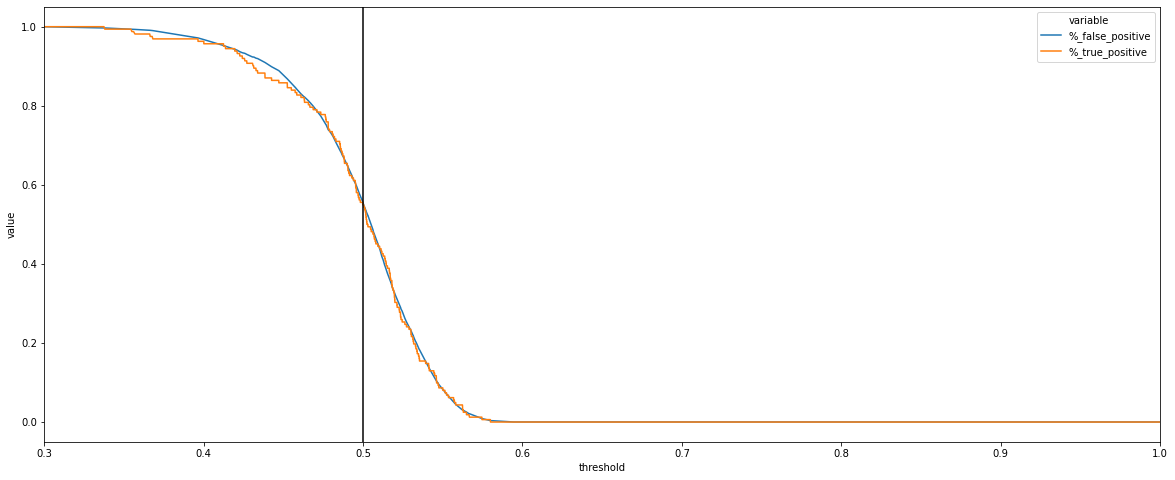

In [455]:
# Ploting the ROC curve
df_key_rates_plot = df_key_rates.melt(id_vars = 'threshold')
plt.figure(figsize=(20,8))
sns.lineplot(data=df_key_rates_plot,x='threshold',y='value',hue='variable')
plt.xlim(0.3,1)
plt.axvline(x=0.5,color = 'k')
plt.show()

In [456]:
# False postive and True positive rates for our model
df_key_rates.query('threshold >= 0.5 & threshold <= 0.51').mean()

%_false_positive    0.508054
%_true_positive     0.496914
threshold           0.504174
dtype: float64

In [457]:
metrics.accuracy_score(valid_y,df_logit_predict>0.515)

0.6148285449490268

In [458]:
print("------------------------- Train -----------------\n")
print(classification_report(y_train_res,df_logit_predict_train>0.515))
print("------------------------- Test -----------------\n")
print(classification_report(valid_y,df_logit_predict>0.515))

------------------------- Train -----------------

              precision    recall  f1-score   support

           0       0.52      0.62      0.56     20932
           1       0.53      0.42      0.47     20932

    accuracy                           0.52     41864
   macro avg       0.52      0.52      0.52     41864
weighted avg       0.52      0.52      0.52     41864

------------------------- Test -----------------

              precision    recall  f1-score   support

           0       0.97      0.62      0.76      5233
           1       0.03      0.40      0.06       162

    accuracy                           0.61      5395
   macro avg       0.50      0.51      0.41      5395
weighted avg       0.94      0.61      0.74      5395



In [459]:
confusion_matrix(valid_y,df_logit_predict>0.515)

array([[3253, 1980],
       [  98,   64]], dtype=int64)

In [460]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                41864
Model:                          Logit   Df Residuals:                    41855
Method:                           MLE   Df Model:                            8
Date:                Sun, 02 Jan 2022   Pseudo R-squ.:                0.004717
Time:                        23:36:17   Log-Likelihood:                -28881.
converged:                       True   LL-Null:                       -29018.
Covariance Type:            nonrobust   LLR p-value:                 1.562e-54
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
monto             -0.3179      0.098     -3.257      0.001      -0.509      -0.127
hora               0.2167      0.031      6.997      0.000       0.156       0.277
linea_tc          -0.1125      0.032     -3.540      0.000      -0.175      -0.050
is_prime          -0.0425      0.029     -1.448      0.148      -0.100       0.015
dcto              -0.6867      0.068    -10.132      0.000      -0.819      -0.554
cashback           0.3100      0.126      2.453      0.014       0.062       0.558
tipo_tc_Física     0.1039      0.032      3.270      0.001       0.042       0.166
os_ANDROID         0.0907      0.024      3.860      0.000       0.045       0.137
os_WEB            -0.1109      0.024     -4.626      0.000      -0.158      -0.064
==================================================================================
"""

In [461]:
pd.DataFrame(np.abs(model_fit.params)).sort_values(by=0,ascending = False)

,0
dcto,0.686665
monto,0.317923
cashback,0.310043
hora,0.216738
linea_tc,0.112549
os_WEB,0.110943
tipo_tc_Física,0.103934
os_ANDROID,0.090733
is_prime,0.042469


In [462]:
#Conclusiones:
#1. Las variables más importante son dscto,monto, cashback, hora
#y las menos importane son is_prime y os_Android, siendo prime no significat

#Intepretar las varibales
# Al tener coeficiente negativo el monto, significa que a hay más probabilidad de que ocurra fraude si el monto es bajo
#Para la hora, si es más tarde, más probabilidad de que haya una trs fraudulenta


In [463]:
# Analizando la matriz de confusion

In [464]:
# Particionando la muestra en train(70%) y test (30%)
train_x2, valid_x2, train_y2, valid_y2 = train_test_split(df_trx,
                                                      y_total,
                                                      test_size=0.2,
                                                      shuffle=True,
                                                      random_state=123,
                                                      stratify=y_total)

In [465]:
df_trx.head()

,ID_USER,monto,hora,linea_tc,interes_tc,is_prime,dcto,cashback,fraude,device_score,...,os_OTRO,os_SIN_INFORMACION,os_WEB,DiaSemana_Friday,DiaSemana_Monday,DiaSemana_Saturday,DiaSemana_Sunday,DiaSemana_Thursday,DiaSemana_Tuesday,DiaSemana_Wednesday
0,0,608.345634,20,71000,51,0,60.834563,5.475111,0,3,...,0,0,0,0,0,0,0,0,1,0
1,0,88.719243,7,71000,51,0,0.000000,1.774385,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,790.037653,11,94000,56,0,0.000000,15.800753,0,1,...,0,1,0,1,0,0,0,0,0,0
3,1,767.005387,11,94000,56,0,0.000000,7.670054,0,3,...,0,0,1,0,0,0,1,0,0,0
4,1,254.171053,10,94000,56,0,0.000000,2.541711,0,3,...,1,0,0,0,0,0,0,1,0,0


In [466]:

data_final = pd.DataFrame({'ID_USER':valid_x2["ID_USER"],
                        'monto':valid_x2["monto"],
                        'fraude': valid_y2,   
                        'Prob':df_logit_predict})

data_final["fraude_pred"] = np.where(data_final["Prob"]>0.515,1,0)
data_final.head()

,ID_USER,monto,fraude,Prob,fraude_pred
21775,3233,722.097584,0,0.514878,0
7794,1191,227.308228,0,0.480125,0
24850,3678,44.977744,0,0.505504,0
14408,2151,688.406975,0,0.495767,0
12659,1877,713.854147,0,0.498155,0


In [467]:
print("Real/Predicho")
confusion_matrix(data_final['fraude'],data_final['fraude_pred'])


Real/Predicho


array([[3253, 1980],
       [  98,   64]], dtype=int64)

In [468]:
print(classification_report(data_final['fraude'],data_final['fraude_pred']))

              precision    recall  f1-score   support

           0       0.97      0.62      0.76      5233
           1       0.03      0.40      0.06       162

    accuracy                           0.61      5395
   macro avg       0.50      0.51      0.41      5395
weighted avg       0.94      0.61      0.74      5395



In [469]:
#Interpretar: 
#Total 5395 trxs
#159 trxs fraudulentas
#Predicho: 2044

#Precision: El modelo me hay 3351 no fraudulentos y 2044 fraudulentos
#De esos 3253 acierta y es precision para la clase no fraudulenta
#Para la no fraudulenta, solo es 3%, es decirl, acierta 64 de los 2044
#El riesgo de esto es que detuvo 1980 operaciones
# pero acertó 64
# Y por el otro lado, hubieron 98 trxs que pasaron como buenas pero eran fraude

#El recall parte de los que realmente son fraudes o no fraudes y cuanto de ellos se acertó
#de los 159 fraudulentos solo acerté con 64
#Y esmi indicador que debería maximizar pero sin descuidar la precision pero de mi clase fraudulenta, ya que 
#al cambiar el punto de corte, aumenta mi prediciones de fraude, pero estaría disminuyendo la precisión de
# de los que no son fraudulento y haría más lento mi gestión y causaría insatisfacción por parte de los clientes



In [470]:
beneficio = data_final.groupby(['fraude_pred','fraude'])[['monto']].sum().reset_index().rename(columns={"fraude":"fraude_real"})
beneficio.head()



,fraude_pred,fraude_real,monto
0,0,0,1.825199e+06
1,0,1,5.904265e+04
2,1,0,7.885253e+05
3,1,1,2.235117e+04


In [372]:
#Pierdo 59,042 ya que el modelo me dice que no es fraude y si lo es
#Pierdo porque dejo de ganar: 788,525 porque el modelo me dice que es fraude y realmente no lo es
#Gano: 22,351 ya que fueron trxs que son fraude y lo pude detectar

#Y si no tuviera un modelo sería 81,000 aprox
#Entonces nos centramos en que tengo 27% de gastos que ya no serán por fraude.

#Hay mucho por mejorar en el modelo pero a pesar de ello, ya me genera valor y tomar ciertas casuístcas para
#no relentizar los Falsos positivos , ya que les digo que son fraude pero realmente no lo son


In [471]:
data_final["DecilProbabilidad"]=pd.qcut(data_final["Prob"],3,labels=False,duplicates="drop")
data_final["DecilProbabilidad"]=data_final["DecilProbabilidad"]+1
data_final.head()

,ID_USER,monto,fraude,Prob,fraude_pred,DecilProbabilidad
21775,3233,722.097584,0,0.514878,0,2
7794,1191,227.308228,0,0.480125,0,1
24850,3678,44.977744,0,0.505504,0,2
14408,2151,688.406975,0,0.495767,0,2
12659,1877,713.854147,0,0.498155,0,2


In [472]:
pd.qcut(data_final["Prob"],3,duplicates="drop").unique().sort_values()

[(0.298, 0.488], (0.488, 0.519], (0.519, 0.594]]
Categories (3, interval[float64, right]): [(0.298, 0.488] < (0.488, 0.519] < (0.519, 0.594]]

In [474]:
def f(x):
    N =  x.DecilProbabilidad.count()
    fraude = x.fraude.sum()
    r_fraude = round(100*fraude/N,2)
    Monto = x.monto.sum()
    c = ['N','fraude','r_fraude','Monto']
    return pd.Series([N, fraude, r_fraude, Monto], 
                     index=c)

decil_trx = data_final.groupby('DecilProbabilidad').apply(f).reset_index().sort_values("DecilProbabilidad", ascending=False)
decil_trx

,DecilProbabilidad,N,fraude,r_fraude,Monto
2,3,1798.0,54.0,3.00,6.995746e+05
1,2,1798.0,55.0,3.06,8.893039e+05
0,1,1799.0,53.0,2.95,1.106240e+06


In [ ]:
#para este modelo no tiene mucho sentido sacar grupos porque no es muy preciso y no tiene un ordenamiento

### Guardamos pkls para replicar del modelo

In [373]:
var_model_trxs = X_train_res.columns
var_model_trxs


# Para guardar objetos:
#import joblib
#joblib.dump(var_model_trxs, 'var_model_trxs.pkl')

#joblib.dump(model_fit, 'reg_log_trxs.pkl')
#joblib.dump(scaler, 'scale_reg_log_trxs.pkl')

['scale_reg_log_trxs.pkl']

### B. Modelo a nivel Cliente

In [374]:
df_cli_clus.head()

,ID_USER,monto,n_fraude,tipo_tc_Física,status_txn_Rechazada,os_ANDROID,os_WEB,FLG_prime,FLG_fraude,Trxs,linea_tc,interes_tc,device_score,Cluster
0,0,697.064876,0,1,0,2,0,0,0,2,71000.0,51.0,2.000000,BV_RI
1,1,3416.796066,0,5,1,0,1,0,0,7,94000.0,56.0,2.428571,BV_RI
2,2,2789.893416,0,6,0,3,3,0,0,7,55000.0,57.0,2.714286,AV_RMA
3,3,477.972148,0,2,0,2,0,0,0,2,62000.0,34.0,2.500000,MV_RA
4,4,277.176524,0,1,0,0,1,0,0,1,83000.0,37.0,2.000000,MV_RA


In [375]:
# Las clases están desbalanceadas
print('No Fraude:', round(df_cli_clus['FLG_fraude'].value_counts()[0]/len(df_cli_clus) * 100,2), '% del dataset','con',df_cli_clus['FLG_fraude'].value_counts()[0],'Clientes' )
print('Fraude:', round(df_cli_clus['FLG_fraude'].value_counts()[1]/len(df_cli_clus) * 100,2), '% del dataset','con',df_cli_clus['FLG_fraude'].value_counts()[1],'Clientes' )

No Fraude: 83.12 % del dataset con 3325 Clientes
Fraude: 16.88 % del dataset con 675 Clientes


In [376]:
#Excluiremos algunas variables que no tienen nada que ver con el modelo

In [377]:
# Variables finales que entrarian al modelo:
#Hay algunas variables que voy a excluir
vars_ex = [f for f in df_cli_clus.columns if f not in ['n_fraude'
,'os_ANDROID'                                                                             
,'FLG_prime'
,'tipo_tc_Física'                                                      ]]
df_cli_final = df_cli_clus[vars_ex]

In [378]:
clust_map = {
    'BV_RI':3,
    'MV_RA':2,
    'BV_RB':4,
    'AV_RMA':1
}

df_cli_final.Cluster = df_cli_final.Cluster.map(clust_map)
df_cli_final.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ID_USER,monto,status_txn_Rechazada,os_WEB,FLG_fraude,Trxs,linea_tc,interes_tc,device_score,Cluster
0,0,697.064876,0,0,0,2,71000.0,51.0,2.000000,3
1,1,3416.796066,1,1,0,7,94000.0,56.0,2.428571,3
2,2,2789.893416,0,3,0,7,55000.0,57.0,2.714286,1
3,3,477.972148,0,0,0,2,62000.0,34.0,2.500000,2
4,4,277.176524,0,1,0,1,83000.0,37.0,2.000000,2


In [379]:
# Variables finales que entrarian al modelo:
#Hay algunas variables que voy a excluir
vars_in = [f for f in df_cli_final.columns if f not in ['ID_USER'
                                                ,'FLG_fraude'
                ]]

X_total = df_cli_final[vars_in]
y_total = df_cli_final['FLG_fraude']

#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(X_total)

scaler = preprocessing.MinMaxScaler() 
a = X_total.columns
X_scaled = scaler.fit(X_total).transform(X_total)

X_scaled = pd.DataFrame(X_scaled, columns=a)
X_scaled = X_scaled.reset_index(drop=True)
#df_total_scale = pd.concat((df_cli_clus2,X_scaled),axis=1)
X_scaled = X_scaled.reset_index(drop=True)
X_scaled.head()

,monto,status_txn_Rechazada,os_WEB,Trxs,linea_tc,interes_tc,device_score,Cluster
0,0.021219,0.000000,0.000000,0.016393,0.621622,0.59375,0.250000,0.666667
1,0.104252,0.111111,0.058824,0.098361,0.932432,0.75000,0.357143,0.666667
2,0.085113,0.000000,0.176471,0.098361,0.405405,0.78125,0.428571,0.000000
3,0.014530,0.000000,0.000000,0.016393,0.500000,0.06250,0.375000,0.333333
4,0.008400,0.000000,0.058824,0.000000,0.783784,0.15625,0.250000,0.333333


In [380]:

# Particionando la muestra en train(70%) y test (30%)
train_x, valid_x, train_y, valid_y = train_test_split(X_scaled,
                                                      y_total,
                                                      test_size=0.2,
                                                      shuffle=True,
                                                      random_state=123,
                                                      stratify=y_total)

In [381]:
print('Antes de hacer OverSampling, las dimnesiones del train_X: {}'.format(train_x.shape))
print('Antes de hacer OverSampling, las dimnesiones del train_y: {}'.format(train_y.shape)) 
print("Antes de hacer OverSampling, # de registros con fraude: {}".format(sum(train_y == 1)))
print("Antes de hacer OverSampling, # de registros sin fraude: {}".format(sum(train_y == 0)))

Antes de hacer OverSampling, las dimnesiones del train_X: (3200, 8)
Antes de hacer OverSampling, las dimnesiones del train_y: (3200,)
Antes de hacer OverSampling, # de registros con fraude: 540
Antes de hacer OverSampling, # de registros sin fraude: 2660


In [382]:
# SMOTE - TECNICA DE OVERSAMPLING
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(train_x, train_y.ravel())


In [383]:
print('Después de hacer OverSampling, las dimnesiones del train_X: {}'.format(X_train_res.shape))
print('Después de hacer OverSampling, las dimnesiones del train_y: {}'.format(y_train_res.shape)) 
print("Después de hacer OverSampling, # de registros con fraude: {}".format(sum(y_train_res == 1)))
print("Después de hacer OverSampling, # de registros sin fraude: {}".format(sum(y_train_res == 0)))


Después de hacer OverSampling, las dimnesiones del train_X: (5320, 8)
Después de hacer OverSampling, las dimnesiones del train_y: (5320,)
Después de hacer OverSampling, # de registros con fraude: 2660
Después de hacer OverSampling, # de registros sin fraude: 2660


## Regresión logística

In [384]:
model = Logit(endog = y_train_res, exog = X_train_res, missing = 'none')
model_fit = model.fit()

Optimization terminated successfully.
         Current function value: 0.600421
         Iterations 6


In [385]:
df_logit_predict_train = model_fit.predict(X_train_res)
df_logit_predict = model_fit.predict(valid_x)

In [386]:
df_key_rates = pd.DataFrame(metrics.roc_curve(valid_y,df_logit_predict)).T
df_key_rates.columns = ['%_false_positive','%_true_positive','threshold']

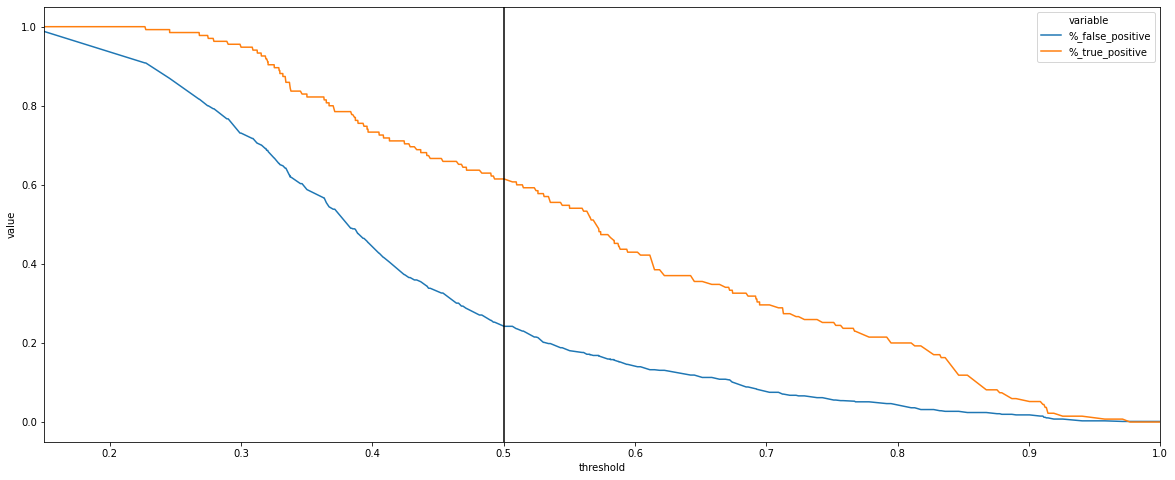

In [387]:
# Ploting the ROC curve
df_key_rates_plot = df_key_rates.melt(id_vars = 'threshold')
plt.figure(figsize=(20,8))
sns.lineplot(data=df_key_rates_plot,x='threshold',y='value',hue='variable')
plt.xlim(0.15,1)
plt.axvline(x=0.5,color = 'k')
plt.show()

In [388]:
# False postive and True positive rates for our model
df_key_rates.query('threshold >= 0.5 & threshold <= 0.51').mean()

%_false_positive    0.239098
%_true_positive     0.607407
threshold           0.506574
dtype: float64

In [389]:
metrics.accuracy_score(valid_y,df_logit_predict>0.515)

0.74125

In [390]:
print("------------------------- Train -----------------\n")
print(classification_report(y_train_res,df_logit_predict_train>0.5))
print("------------------------- Test -----------------\n")
print(classification_report(valid_y,df_logit_predict>0.5))

------------------------- Train -----------------

              precision    recall  f1-score   support

           0       0.67      0.74      0.70      2660
           1       0.71      0.63      0.67      2660

    accuracy                           0.69      5320
   macro avg       0.69      0.69      0.68      5320
weighted avg       0.69      0.69      0.68      5320

------------------------- Test -----------------

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       665
           1       0.34      0.61      0.44       135

    accuracy                           0.73       800
   macro avg       0.62      0.69      0.63       800
weighted avg       0.81      0.73      0.76       800



In [391]:
confusion_matrix(valid_y,df_logit_predict>0.5)

array([[504, 161],
       [ 52,  83]], dtype=int64)

In [392]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5320
Model:                          Logit   Df Residuals:                     5312
Method:                           MLE   Df Model:                            7
Date:                Sun, 02 Jan 2022   Pseudo R-squ.:                  0.1338
Time:                        23:11:12   Log-Likelihood:                -3194.2
converged:                       True   LL-Null:                       -3687.5
Covariance Type:            nonrobust   LLR p-value:                9.428e-209
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
monto                   -4.3709      1.415     -3.089      0.002      -7.144      -1.597
status_txn_Rechazada    -0.8742      0.365     -2.394      0.017      -1.590      -0.158
os_WEB                  -1.9066      0.468     -4.073      0.000      -2.824      -0.989
Trxs                    15.2847      1.459     10.478      0.000      12.426      18.144
linea_tc                -0.3524      0.113     -3.123      0.002      -0.574      -0.131
interes_tc              -0.1936      0.092     -2.108      0.035      -0.374      -0.014
device_score            -0.9373      0.123     -7.636      0.000      -1.178      -0.697
Cluster                 -0.3934      0.103     -3.838      0.000      -0.594      -0.192
========================================================================================
"""

In [393]:
pd.DataFrame(np.abs(model_fit.params)).sort_values(by=0,ascending = False)

,0
Trxs,15.284727
monto,4.370913
os_WEB,1.906642
device_score,0.937344
status_txn_Rechazada,0.874192
Cluster,0.393420
linea_tc,0.352389
interes_tc,0.193581


In [394]:
#Conclusiones:
#1. Las variables más importante son Trxs, monto y web
#y las menos importane son linea tc e interes TC

#Intepretar las varibales
# Al tener coeficiente positivo las trxs, significa que hay más probabilidad de que ocurra fraude si tienen más trxs
#y con respecto al monto, con monto bajo, más probabilidad de que ocurra fraude (coef negativo)




In [395]:
# Particionando la muestra en train(70%) y test (30%)
train_x2, valid_x2, train_y2, valid_y2 = train_test_split(df_cli_final,
                                                      y_total,
                                                      test_size=0.2,
                                                      shuffle=True,
                                                      random_state=123,
                                                      stratify=y_total)

In [396]:

data_final = pd.DataFrame({'ID_USER':valid_x2["ID_USER"],
                        'monto':valid_x2["monto"],
                        'fraude': valid_y2,   
                        'Prob':df_logit_predict})

data_final["fraude_pred"] = np.where(data_final["Prob"]>0.5,1,0)
data_final.head()

,ID_USER,monto,fraude,Prob,fraude_pred
3011,3011,4408.893447,0,0.306468,0
1530,1530,2375.901529,0,0.332581,0
1060,1060,2064.000554,1,0.308463,0
2095,2095,4874.063152,0,0.594397,1
3497,3497,2165.016912,0,0.394975,0


In [397]:
print("Real/Predicho")
confusion_matrix(data_final['fraude'],data_final['fraude_pred'])


Real/Predicho


array([[504, 161],
       [ 52,  83]], dtype=int64)

In [398]:
print(classification_report(data_final['fraude'],data_final['fraude_pred']))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       665
           1       0.34      0.61      0.44       135

    accuracy                           0.73       800
   macro avg       0.62      0.69      0.63       800
weighted avg       0.81      0.73      0.76       800



In [399]:
#Interpretar: 
#Total 800 clientes
#135 usuarios fraudulentos
#Predicho: 244 predicho como fraudulento

#Precision: El modelo me dice hay 556 no fraudulentos y 244 fraudulentos
#De esos 504 acierta y es precision para la clase no fraudulenta
#Para la no fraudulenta, solo es 34%, es decir, acierta 83 de los 244
#El riesgo de esto es que dijo que 161 clientes era fraudulentos cuando no lo son y genera incomodidad

# Y por el otro lado, hubieron 52 usuarios que pasaron como buenas pero eran fraudulentos

#El recall parte de los que realmente son fraudulentos o no fraudulentos y cuanto de ellos se acertó
#de los 135 fraudulentos acertó 83
#Donde se evidencia que se está prediciendo los fraudulentos por encima de la mitad y eso es bueno


In [400]:
beneficio = data_final.groupby(['fraude_pred','fraude'])[['monto']].sum().reset_index().rename(columns={"fraude":"fraude_real"})
beneficio.head()



,fraude_pred,fraude_real,monto
0,0,0,923404.237827
1,0,1,157849.996562
2,1,0,988626.010774
3,1,1,605480.135944


In [401]:
#Pierdo 157,849 ya que el modelo me dice que no es fraude y si lo es
#Pierdo porque dejo de ganar: 988,626 porque el modelo me dice que es fraude y realmente no lo es
#Gano: 605,480 ya que detecto el monto total de los clientes que me iban a cometer fraude en algún momento

#Y si no tuviera un modelo sería 760,000 aprox
#Entonces nos centramos en que tengo 80% de gastos que ya no serán por fraude.

#Esto es el monto del fraude pontencial, ya que si esa cantidad son sus gastos, es lo que puede gastar 
#para cometer un fraude y serían los gastos que tendrías que asumir como empresa si se concreta el fraude 


### Guardamos pkls para replicar del modelo

In [402]:
var_model_trxs = X_train_res.columns
var_model_trxs


# Para guardar objetos:
#import joblib
#joblib.dump(var_model_trxs, 'var_model_cliente_rl.pkl')

#joblib.dump(model_fit, 'reg_log_cliente.pkl')


Index(['monto', 'status_txn_Rechazada', 'os_WEB', 'Trxs', 'linea_tc',
       'interes_tc', 'device_score', 'Cluster'],
      dtype='object')

## LGBM

In [403]:
# Variables finales que entrarian al modelo:
#Hay algunas variables que voy a excluir
vars_ex = [f for f in df_cli_clus.columns if f not in ['n_fraude'
                                                    ]]
df_cli_final = df_cli_clus[vars_ex]

In [404]:
clust_map = {
    'BV_RI':3,
    'MV_RA':2,
    'BV_RB':4,
    'AV_RMA':1
}

df_cli_final.Cluster = df_cli_final.Cluster.map(clust_map)
df_cli_final.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ID_USER,monto,tipo_tc_Física,status_txn_Rechazada,os_ANDROID,os_WEB,FLG_prime,FLG_fraude,Trxs,linea_tc,interes_tc,device_score,Cluster
0,0,697.064876,1,0,2,0,0,0,2,71000.0,51.0,2.000000,3
1,1,3416.796066,5,1,0,1,0,0,7,94000.0,56.0,2.428571,3
2,2,2789.893416,6,0,3,3,0,0,7,55000.0,57.0,2.714286,1
3,3,477.972148,2,0,2,0,0,0,2,62000.0,34.0,2.500000,2
4,4,277.176524,1,0,0,1,0,0,1,83000.0,37.0,2.000000,2


In [475]:
# Variables finales que entrarian al modelo:
#Hay algunas variables que voy a excluir
vars_in = [f for f in df_cli_final.columns if f not in ['ID_USER'
                                                ,'FLG_fraude'
                ]]

X_total = df_cli_final[vars_in]
y_total = df_cli_final['FLG_fraude']

#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(X_total)

scaler = preprocessing.MinMaxScaler() 
a = X_total.columns
X_scaled = scaler.fit(X_total).transform(X_total)

X_scaled = pd.DataFrame(X_scaled, columns=a)
X_scaled = X_scaled.reset_index(drop=True)
#df_total_scale = pd.concat((df_cli_clus2,X_scaled),axis=1)
X_scaled = X_scaled.reset_index(drop=True)
X_scaled.head()

,monto,tipo_tc_Física,status_txn_Rechazada,os_ANDROID,os_WEB,FLG_prime,Trxs,linea_tc,interes_tc,device_score,Cluster
0,0.021219,0.023810,0.000000,0.133333,0.000000,0.0,0.016393,0.621622,0.59375,0.250000,0.666667
1,0.104252,0.119048,0.111111,0.000000,0.058824,0.0,0.098361,0.932432,0.75000,0.357143,0.666667
2,0.085113,0.142857,0.000000,0.200000,0.176471,0.0,0.098361,0.405405,0.78125,0.428571,0.000000
3,0.014530,0.047619,0.000000,0.133333,0.000000,0.0,0.016393,0.500000,0.06250,0.375000,0.333333
4,0.008400,0.023810,0.000000,0.000000,0.058824,0.0,0.000000,0.783784,0.15625,0.250000,0.333333


In [406]:
# Particionando la muestra en train(70%) y test (30%)
train_x, valid_x, train_y, valid_y = train_test_split(X_scaled,
                                                      y_total,
                                                      test_size=0.2,
                                                      shuffle=True,
                                                      random_state=123,
                                                      stratify=y_total)

In [407]:
# SMOTE - TECNICA DE OVERSAMPLING

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(train_x, train_y.ravel())


In [408]:
# Parametros del LightGBM
param_30 = lgbm.LGBMClassifier(
        n_estimators=350,#500
        learning_rate=0.001,
        boosting_type= 'gbdt',
        objective='binary',
        colsample_bytree=.7,
        subsample=.7,
        max_depth=5#, #8 es el optimo
        #num_leaves = 80#,
        #,class_weight='balanced'
        ,min_child_samples = 50,n_jobs=4
)

# Entrenamiento:
lgbm_model_30 = param_30.fit(X_train_res, y_train_res, 
                eval_set= [(X_train_res, y_train_res), (valid_x, valid_y)], 
                #categorical_feature = vars_cat,
                eval_metric=['f1'], 
                verbose=25,
                early_stopping_rounds=20
               )


Training until validation scores don't improve for 20 rounds
[25]	training's binary_logloss: 0.683048	valid_1's binary_logloss: 0.684801
[50]	training's binary_logloss: 0.673656	valid_1's binary_logloss: 0.676951
[75]	training's binary_logloss: 0.664548	valid_1's binary_logloss: 0.669373
[100]	training's binary_logloss: 0.655861	valid_1's binary_logloss: 0.662209
[125]	training's binary_logloss: 0.647455	valid_1's binary_logloss: 0.65529
[150]	training's binary_logloss: 0.639505	valid_1's binary_logloss: 0.648828
[175]	training's binary_logloss: 0.632098	valid_1's binary_logloss: 0.642716
[200]	training's binary_logloss: 0.624699	valid_1's binary_logloss: 0.636715
[225]	training's binary_logloss: 0.617471	valid_1's binary_logloss: 0.630925
[250]	training's binary_logloss: 0.610784	valid_1's binary_logloss: 0.625466
[275]	training's binary_logloss: 0.604131	valid_1's binary_logloss: 0.62017
[300]	training's binary_logloss: 0.597889	valid_1's binary_logloss: 0.615182
[325]	training's bin

In [409]:
# Importancia de variables:
feature_importance_df = pd.DataFrame()

In [410]:
feature_importance_df["Variable"] = vars_in
feature_importance_df["Importancia"] = lgbm_model_30.feature_importances_
feature_importance_df = feature_importance_df.sort_values(["Importancia"],axis=0,ascending=False)
feature_importance_df = feature_importance_df.reset_index(drop=True)
feature_importance_df.head(100)

,Variable,Importancia
0,Trxs,2722
1,tipo_tc_Física,1150
2,os_ANDROID,816
3,monto,768
4,os_WEB,734
5,status_txn_Rechazada,726
6,device_score,613
7,linea_tc,551
8,interes_tc,407
9,Cluster,124


Text(0.5, 1.0, 'LightGBM Importancia de Variables')

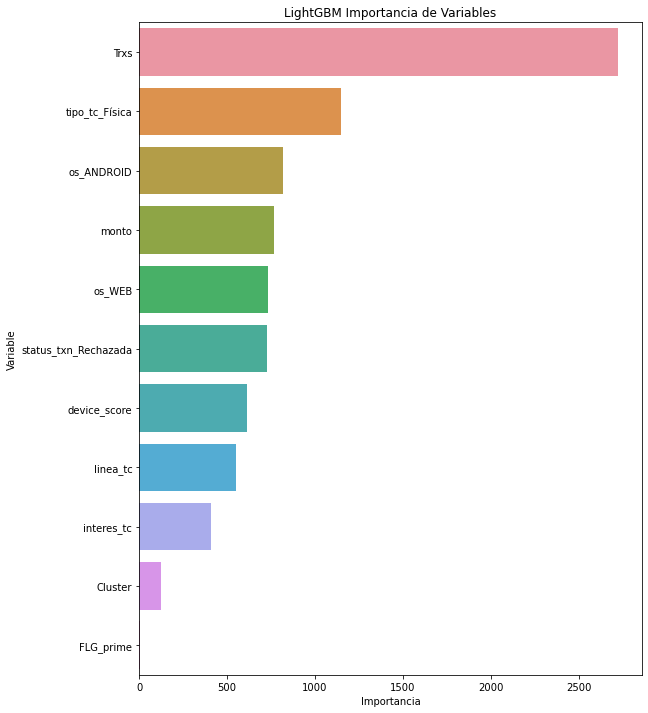

In [411]:
# Ploteando la importancia:
plt.figure(figsize=(9,12))
sns.barplot(x="Importancia", y="Variable", 
            data=feature_importance_df.sort_values(by="Importancia", ascending=False)[:29])
plt.title('LightGBM Importancia de Variables')

In [412]:
#import shap

In [413]:
%time shap_values = shap.TreeExplainer(lgbm_model_30).shap_values(valid_x)

Wall time: 1.29 s


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


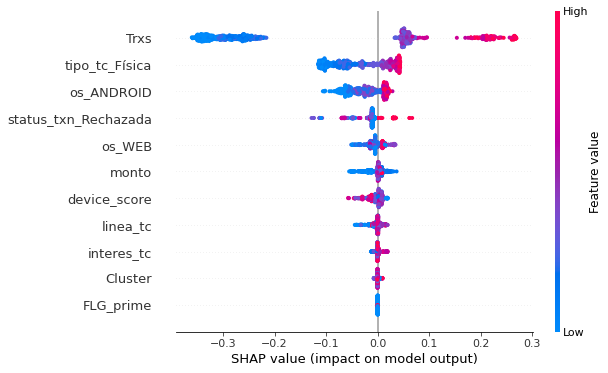

In [414]:
# Grafico para predecir si es fraudulento
shap.summary_plot(shap_values[1], valid_x)
#Izquiera menos prob a ser fraude y a la derecha mas probabilidad de ser fraude 

In [415]:
#https://www.analyticsvidhya.com/blog/2019/11/shapley-value-machine-learning-interpretability-game-theory/
#https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values

In [416]:
# Calculando las predicciones en ambas muestras (train y validacion):
pred_train = lgbm_model_30.predict_proba(X_train_res)[:,1]
pred_valid = lgbm_model_30.predict_proba(valid_x)[:,1]

In [417]:
print("------------------------- Train -----------------\n")
print(classification_report(y_train_res,pred_train>0.5))
print("------------------------- Test -----------------\n")
print(classification_report(valid_y,pred_valid>0.5))

------------------------- Train -----------------

              precision    recall  f1-score   support

           0       0.88      0.71      0.78      2660
           1       0.76      0.90      0.82      2660

    accuracy                           0.81      5320
   macro avg       0.82      0.81      0.80      5320
weighted avg       0.82      0.81      0.80      5320

------------------------- Test -----------------

              precision    recall  f1-score   support

           0       0.92      0.70      0.79       665
           1       0.32      0.69      0.44       135

    accuracy                           0.70       800
   macro avg       0.62      0.69      0.62       800
weighted avg       0.82      0.70      0.73       800



In [418]:
# Particionando la muestra en train(70%) y test (30%)
train_x2, valid_x2, train_y2, valid_y2 = train_test_split(df_cli_final,
                                                      y_total,
                                                      test_size=0.2,
                                                      shuffle=True,
                                                      random_state=123,
                                                      stratify=y_total)

In [419]:

data_final = pd.DataFrame({'ID_USER':valid_x2["ID_USER"],
                        'monto':valid_x2["monto"],
                        'fraude': valid_y2,   
                        'Prob':pred_valid})

data_final["fraude_pred"] = np.where(data_final["Prob"]>0.5,1,0)
data_final.head()

,ID_USER,monto,fraude,Prob,fraude_pred
3011,3011,4408.893447,0,0.480357,0
1530,1530,2375.901529,0,0.438462,0
1060,1060,2064.000554,1,0.393315,0
2095,2095,4874.063152,0,0.515762,1
3497,3497,2165.016912,0,0.424834,0


In [420]:
print("Real/Predicho")
confusion_matrix(data_final['fraude'],data_final['fraude_pred'])


Real/Predicho


array([[466, 199],
       [ 42,  93]], dtype=int64)

In [421]:
print(classification_report(data_final['fraude'],data_final['fraude_pred']))

              precision    recall  f1-score   support

           0       0.92      0.70      0.79       665
           1       0.32      0.69      0.44       135

    accuracy                           0.70       800
   macro avg       0.62      0.69      0.62       800
weighted avg       0.82      0.70      0.73       800



In [422]:
#Interpretar: 
#Total 800 clientes
#135 usuarios fraudulentos
#Predicho: 292 predicho como fraudulento

#Precision: El modelo me dice hay 508 no fraudulentos y 292 fraudulentos
#De esos 466 acierta y es precision para la clase no fraudulenta
#Para la no fraudulenta, solo es 32%, es decir, acierta 93 de los 292
#El riesgo de esto es que dice que 199 clientes era fraudulentos cuando no lo son y genera incomodidad

# Y por el otro lado, hubieron 42 usuarios que pasaron como buenas pero eran fraudulentos

#El recall parte de los que realmente son fraudulentos o no fraudulentos y cuanto de ellos se acertó
#de los 135 fraudulentos acertó 93
#Donde se evidencia que se está prediciendo los fraudulentos por encima de la mitad y eso es bueno

#Este modelo es ligeramente mejor porque llega a predecir e identificar más clientes potenciales a ser 
#fraudulentos
#Pero al tener poca data, tiende a sobreajustar

In [423]:
beneficio = data_final.groupby(['fraude_pred','fraude'])[['monto']].sum().reset_index().rename(columns={"fraude":"fraude_real"})
beneficio.head()



,fraude_pred,fraude_real,monto
0,0,0,7.424619e+05
1,0,1,1.025165e+05
2,1,0,1.169568e+06
3,1,1,6.608137e+05


In [424]:
#Pierdo 102,516 ya que el modelo me dice que no es fraude y si lo es
#Pierdo porque dejo de ganar: 1,169,568 porque el modelo me dice que es fraude y realmente no lo es
#Gano: 608,137 ya que detecto el monto total de los clientes que me iban a cometer fraude en algún momento

#Y si no tuviera un modelo sería 760,000 aprox
#Entonces nos centramos en que tengo 80% de gastos que ya no serán por fraude.

#Esto es el monto del fraude pontencial, ya que si esa cantidad son sus gastos, es lo que puede gastar 
#para cometer un fraude y serían los gastos que tendrías que asumir como empresa si se concreta el fraude 


In [439]:
data_final["DecilProbabilidad"]=pd.qcut(data_final["Prob"],3,labels=False,duplicates="drop")
data_final["DecilProbabilidad"]=data_final["DecilProbabilidad"]+1
data_final.head()

,ID_USER,monto,fraude,Prob,fraude_pred,DecilProbabilidad
3011,3011,4408.893447,0,0.480357,0,2
1530,1530,2375.901529,0,0.438462,0,2
1060,1060,2064.000554,1,0.393315,0,1
2095,2095,4874.063152,0,0.515762,1,3
3497,3497,2165.016912,0,0.424834,0,2


In [442]:
pd.qcut(data_final["Prob"],3,duplicates="drop").unique().sort_values()

[(0.357, 0.4], (0.4, 0.502], (0.502, 0.597]]
Categories (3, interval[float64, right]): [(0.357, 0.4] < (0.4, 0.502] < (0.502, 0.597]]

In [441]:
def f(x):
    N =  x.DecilProbabilidad.count()
    fraude = x.fraude.sum()
    r_fraude = round(100*fraude/N,2)
    Monto = x.monto.sum()
    c = ['N','fraude','r_fraude','Monto']
    return pd.Series([N, fraude, r_fraude, Monto], 
                     index=c)

decil_cli = data_final.groupby('DecilProbabilidad').apply(f).reset_index().sort_values("DecilProbabilidad", ascending=False)
decil_cli

,DecilProbabilidad,N,fraude,r_fraude,Monto
2,3,267.0,83.0,31.09,1.726377e+06
1,2,266.0,43.0,16.17,6.746829e+05
0,1,267.0,9.0,3.37,2.743005e+05


In [ ]:
#Podemos agrupar en 3 niveles: 
#3: riesgo alto
#2: riesgo medio
#1: riesgo bajo

### Guardamos pkls para replicar del modelo

In [476]:
var_model_trxs = X_train_res.columns
var_model_trxs


# Para guardar objetos:
#import joblib
#joblib.dump(var_model_trxs, 'var_model_cliente_lgbm.pkl')

#joblib.dump(model_fit, 'lgbm_cliente.pkl')
#joblib.dump(scaler, 'scale_lgbm_cliente.pkl')

['scale_lgbm_cliente.pkl']

In [258]:
# Fin del modelo. 